In [6]:
import pandas as pd

# Specify the file path (replace with the actual path)
file_path = "desktop/used_car_price_analysis.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Print the first 5 rows of the dataframe to verify correct loading
print("First 5 rows of the dataframe:")
print(df.head())

First 5 rows of the dataframe:
     model  year transmission  mileage fuelType    tax   mpg  engineSize  \
0   Fiesta  2017    Automatic    15944   Petrol  150.0  57.7         1.0   
1    Focus  2018       Manual     9083   Petrol  150.0  57.7         1.0   
2    Focus  2017       Manual    12456   Petrol  150.0  57.7         1.0   
3   Fiesta  2019       Manual    10460   Petrol  145.0  40.3         1.5   
4   Fiesta  2019    Automatic     1482   Petrol  145.0  48.7         1.0   

   price  
0  12000  
1  14000  
2  13000  
3  17500  
4  16500  


In [7]:
# 1. Identify the columns with missing values
missing_columns = df.columns[df.isnull().any()]
print("Columns with missing values:", missing_columns)

# 2. Replace the missing values with the mean value of the column
for column in missing_columns:
    df[column].fillna(df[column].mean(), inplace=True)

# 3. Delete duplicate entries from the DataFrame
df.drop_duplicates(inplace=True)


Columns with missing values: Index(['tax'], dtype='object')


/var/folders/6q/86fy2d8n1833rxzldynq350h0000gn/T/ipykernel_25944/1205578237.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


In [8]:
!pip3 install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 8.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 8.9 MB/s eta 0:00:0000:0100:01m


In [9]:
from sklearn.preprocessing import LabelEncoder

# Step 2: Handle categorical variables by encoding them
# Label encode 'transmission' and 'fuelType' as they have an inherent order (Manual vs Automatic, Petrol vs Diesel)
label_encoder = LabelEncoder()

df['transmission'] = label_encoder.fit_transform(df['transmission'])  # Encoding Manual vs Automatic
#df['fuelType'] = label_encoder.fit_transform(df['fuelType'])  # Encoding Petrol vs Diesel

# Step 3: One-Hot Encoding for 'model' (since it's nominal data)
#df = pd.get_dummies(df, columns=['model'], drop_first=True)  # Drop the first to avoid multicollinearity

df['fuelType'] = df['fuelType'].map(df['fuelType'].value_counts())

target_mean_encoding = df.groupby('model')['price'].mean()
df['model'] = df['model'].map(target_mean_encoding)

# Step 4: Compute the correlation matrix
correlation_matrix = df.corr()

# Step 5: Extract correlations with respect to the target variable ('price')
correlation_with_target = correlation_matrix['price']

# Step 6: Sort the correlations and select top 5 features
top_5_correlations = correlation_with_target.abs().sort_values(ascending=False).head(6)  # Including the target itself
top_5_correlations = top_5_correlations.drop('price')  # Drop the target column itself

# Step 7: Print the top 5 features with the highest correlation to the target
print("Top 5 features with the highest correlation to the target (price):")
print(top_5_correlations)

# Count the number of entries for each unique value in the 'fuelType' column
fuel_type_counts = df['fuelType'].value_counts()

# Print the result
print(fuel_type_counts)

Top 5 features with the highest correlation to the target (price):
model         0.644820
year          0.635715
mileage       0.530483
engineSize    0.411451
tax           0.405970
Name: price, dtype: float64
fuelType
12081    12081
5706      5706
22          22
2            2
1            1
Name: count, dtype: int64


In [10]:
!pip3 install seaborn

Defaulting to user installation because normal site-packages is not writeable


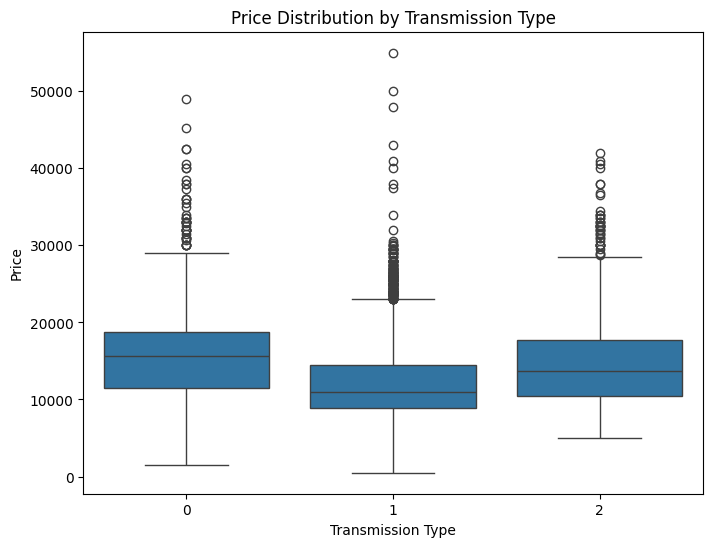

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot using Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x='transmission', y='price', data=df)

# Set the title and labels
plt.title('Price Distribution by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Price')

# Show the plot
plt.show()

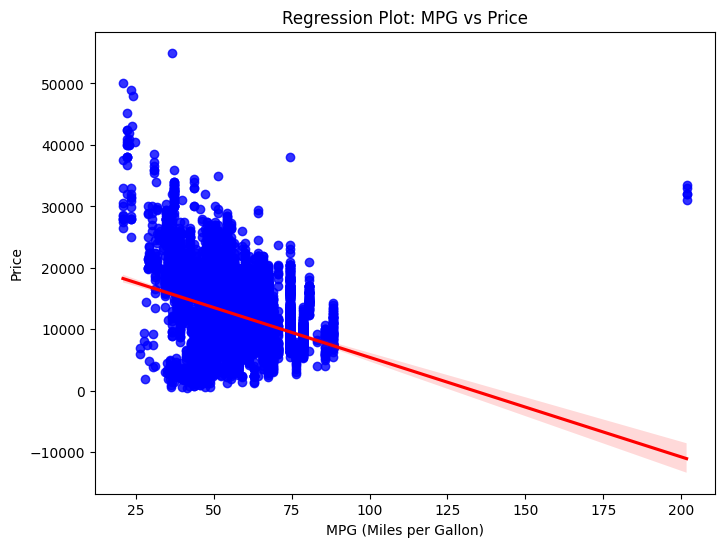

In [14]:
# Create a regression plot using Seaborn
plt.figure(figsize=(8, 6))
sns.regplot(x='mpg', y='price', data=df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

# Set the title and labels
plt.title('Regression Plot: MPG vs Price')
plt.xlabel('MPG (Miles per Gallon)')
plt.ylabel('Price')

# Show the plot
plt.show()

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define the feature and target
X = df[['engineSize']]  # Feature: mpg
y = df['price']  # Target: price

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Predict the prices
y_pred = model.predict(X)

# Calculate R^2 (coefficient of determination)
r2 = r2_score(y, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)

# Print the results
print(f'R^2: {r2}')
print(f'Mean Squared Error (MSE): {mse}')

R^2: 0.16929200997077576
Mean Squared Error (MSE): 18633727.353513896


In [24]:
# Define the features and target
X = df[['model','year', 'mileage', 'tax', 'engineSize']]  # Features
y = df['price']  # Target

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Predict the prices
y_pred = model.predict(X)

# Calculate R² (coefficient of determination)
r2 = r2_score(y, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)

# Print the results
print(f'R²: {r2}')
print(f'Mean Squared Error (MSE): {mse}')

R²: 0.8006627273251778
Mean Squared Error (MSE): 4471362.301793945
